In [1]:
from math import *
import operator
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 

import seaborn as sns
sns.set(style="white", color_codes=True)

from scipy import stats

In [2]:
# Python version
import sys
print('Python: {}'.format(sys.version))
# scipy
import scipy
print('scipy: {}'.format(scipy.__version__))
# numpy
import numpy
print('numpy: {}'.format(numpy.__version__))
# matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
# pandas
import pandas
print('pandas: {}'.format(pandas.__version__))

Python: 3.7.3 (default, Apr 24 2019, 15:29:51) [MSC v.1915 64 bit (AMD64)]
scipy: 1.2.1
numpy: 1.17.2
matplotlib: 2.2.4
pandas: 0.24.2


## Simple usage of One-Sample T-Test
We use a one sample T-test to determine whether our sample mean (observed average) is statistically significantly different to the population mean (expected average).

$$\Large t = \dfrac{\bar{x} – \mu}{SE}$$

Let’s say we want to calculate the resting systolic blood pressure of 20 first-year resident female doctors and compare it to the general public population mean of 120 mmHg.

The null hypothesis is that there is no significant difference between the blood pressure of the resident female doctors and the general population.

In [3]:
female_doctor_bps = [128, 127, 118, 115, 144, 142, 133, 140, 132, 131, 
                     111, 132, 149, 122, 139, 119, 136, 129, 126, 128]

In [5]:
stats.ttest_1samp(female_doctor_bps, 120)

Ttest_1sampResult(statistic=4.512403659336718, pvalue=0.00023838063630967753)

The p-value in this case is 0.0002, which is far less than the standard thresholds of 0.05 or 0.01, so we reject the null hypothesis and we can say there is a statistically significant difference between the resting systolic blood pressure of the resident female doctors and the general population.

## Two-sample T-test
A two sample T-test is used to compare the means of two separate samples.

It is calculated as follows (assuming equal variances):

$$ t = \dfrac{(\bar{x}_1 + \bar{x}_2)}{\sqrt{s_p^2(\dfrac{1}{n_1} + \dfrac{1}{n_2})}} $$

Where $s_p^2$ is the pooled variance, calculated as follows:

$$ s_p^2 = \dfrac{(n_1 – 1)s_1^2 + (n_2 – 2)s_2^2}{n_1 + n_2 – 2} $$

Let’s look at an example to compare the blood pressure of male consultant doctors with the junior resident female doctors we explored above.

Our null hypothesis in this case is that there is no statistically significant difference in the mean of male consulting doctors and junior resident female doctors.

In [7]:
female_doctor_bps = [128, 127, 118, 115, 144, 142, 133, 140, 132, 131, 
                     111, 132, 149, 122, 139, 119, 136, 129, 126, 128]

male_consultant_bps = [118, 115, 112, 120, 124, 130, 123, 110, 120, 121,
                      123, 125, 129, 130, 112, 117, 119, 120, 123, 128]


In [8]:
stats.ttest_ind(female_doctor_bps, male_consultant_bps)

Ttest_indResult(statistic=3.5143256412718564, pvalue=0.0011571376404026158)

The p-value in this case is 0.0012, which again is below than the standard thresholds of 0.05 or 0.01, so we reject the null hypothesis and we can say there is a statistically significant difference between the resting systolic blood pressure of the resident female doctors and the male consultant doctors.

## Gaussian distribution

- loc   : [float or array_like]Mean of the distribution. 

- scale : [float or array_like]Standard deviation of the distribution. 

- size  : [int or int tuples]. 

Output shape given as (m, n, k) then m*n*k samples are drawn. If size is 
None(by default), then a single value is returned. 

In [3]:
N = 100

In [118]:
# Gaussian distributed data with mean = 2 and var = 1
mu1, sigma1 = 2, 1

s1 = np.random.normal(mu1, sigma1, N)
s1.mean(), s1.std()

(2.1031913858154043, 0.903763157929831)

In [120]:
# Gaussian distributed data with mean = 0 and var = 1
mu2, sigma2 = 0, 1

s2 = np.random.normal(mu2, sigma2, N)
s2.mean(), s2.std()

(0.028582256466933607, 0.9012516261118529)

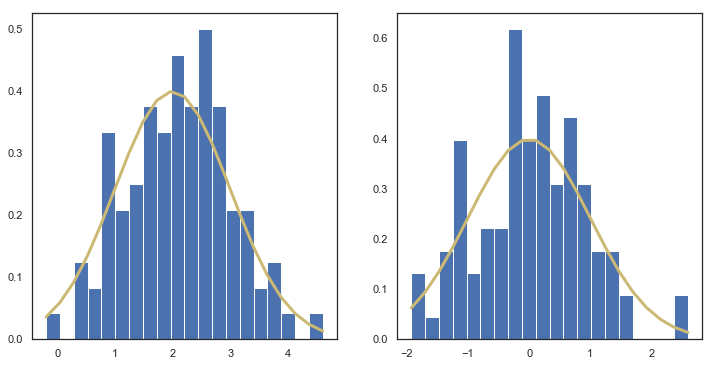

In [121]:
fig = plt.figure(figsize=(12, 6))

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

# Create the bins and histogram
count, bins, ignored = ax1.hist(s1, 20, normed=True)

# Plot the distribution curve
ax1.plot(bins, 
         1/(sigma1 * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu1)**2 / (2 * sigma1**2) ), 
         linewidth=3, 
         color='y');

# Create the bins and histogram
count, bins, ignored = ax2.hist(s2, 20, normed=True)

# Plot the distribution curve
ax2.plot(bins, 
         1/(sigma2 * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu2)**2 / (2 * sigma2**2) ), 
         linewidth=3, 
         color='y');

In [122]:
# calculate means
mean1, mean2 = np.mean(s1), np.mean(s2)

In [123]:
# calculate standard errors
se1, se2 = scipy.stats.sem(s1), scipy.stats.sem(s2)

In [124]:
# standard error on the difference between the samples
sed = sqrt(se1**2.0 + se2**2.0)

In [125]:
# calculate the t statistic
t_stat = (mean1 - mean2) / sed
t_stat

16.172892358875004

In [126]:
# degrees of freedom
degree_freedom = len(s1) + len(s2) - 2
degree_freedom

198

In [127]:
# calculate the critical value
alpha = 0.05
cv = scipy.stats.t.ppf(1.0 - alpha, degree_freedom)
cv

1.6525857836172075

In [128]:
# calculate the p-value
p = (1.0 - scipy.stats.t.cdf(abs(t_stat), degree_freedom)) * 2.0
p

0.0

In [129]:
# compare samples
print('t=%15.8f, p=%15.8f' % (t_stat, p))

# interpret via critical value
if abs(t_stat) <= cv:
    print('CV      : Accept null hypothesis --> the means are equal.')
else:
    print('CV      : Reject the null hypothesis --> the means are NOT equal.')
    
# interpret via p-value
if p > alpha:
    print('p-value : Accept null hypothesis --> the means are equal.')
else:
    print('p-value : Reject the null hypothesis --> the means are NOT equal.')

t=    16.17289236, p=     0.00000000
CV      : Reject the null hypothesis --> the means are NOT equal.
p-value : Reject the null hypothesis --> the means are NOT equal.


### using scipy

In [130]:
stats.ttest_ind(s1, s2)

Ttest_indResult(statistic=16.172892358875, pvalue=4.6941830869787896e-38)